In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/puyallup/"

In [4]:
df = pd.read_csv("https://www.rmis.org/reports/CSV17200.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)   

,tag_type,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,release_stage,release_strategy,avg_length,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,release_location_name,hatchery_location_name,release_location_rmis_basin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,NaN,5,3.0,2015,20160316,20160316,3F10511 100029 R,3F10511 100029 H,F,FR,51.0,NaN,NaN,NaN,NaN,0.0,66820.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,66820,0
1,16.0,3,4.0,2015,20160424,20160509,3F10511 100031 R,3F10511 100029 H,S,VO,NaN,NaN,NaN,NaN,NaN,0.0,828.0,NaN,NaN,B,NaN,WHITE R 10.0031,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,828,0
2,12.0,2,3.0,2020,20220523,20220523,3F10511 100600 R04,3F10511 100414 H,S,FR,145.0,5000.0,51110.0,NaN,NaN,5000.0,10889.0,NaN,NaN,B,0.0129,KAPOWSIN LK NET PENS,VOIGHTS CR HATCHERY,PUYA,51110,0,10889,0,0
3,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,50.0,NaN,NaN,NaN,NaN,0.0,89800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,89800,0
4,NaN,5,3.0,2017,20180312,20180312,3F10511 100029 R,3F10511 100029 H,F,VO,49.0,NaN,NaN,NaN,NaN,0.0,707850.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,707850,0
5,NaN,5,3.0,2017,20180320,20180320,3F10511 100029 R,3F10511 100029 H,F,VO,49.0,NaN,NaN,NaN,NaN,0.0,367800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,367800,0
6,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,51.0,NaN,NaN,NaN,NaN,0.0,91920.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,91920,0
7,NaN,5,3.0,2017,20180327,20180327,3F10511 100029 R,3F10511 100029 H,F,VO,52.0,NaN,NaN,NaN,NaN,0.0,91900.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,91900,0
8,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,50.0,NaN,NaN,NaN,NaN,0.0,89800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,89800,0
9,NaN,2,3.0,2016,20180515,20180515,3F10511 100027 H01,3F10511 100414 H,S,FR,125.0,NaN,NaN,NaN,NaN,5000.0,144190.0,NaN,NaN,B,NaN,CLARKS CRK HATCHERY,VOIGHTS CR HATCHERY,PUYA,0,0,144190,0,0


In [5]:
df['first_release_date'] =  pd.to_datetime(df['first_release_date'], format='%Y%m%d')
df['last_release_date'] =  pd.to_datetime(df['last_release_date'], format='%Y%m%d')
df['total'] = (df['tagged_adclipped'] + df['tagged_unclipped'] + df['untagged_adclipped'] + 
               df['untagged_unclipped'] + df['untagged_unknown'])
df['unclipped'] = (df['tagged_unclipped'] + df['untagged_unclipped'] + df['untagged_unknown'])
df['prop_unclipped'] = df['unclipped']/df['total']
df['prop_untagged_unclipped'] = (df['untagged_unclipped']+ df['untagged_unknown'])/df['total']

In [6]:
subset_df = df[(df['first_release_date'].dt.year >= 2004) & (df['first_release_date'].dt.year <= 2023)]
chinook_subset_df = subset_df[(subset_df['species'] == 1)]

In [7]:
subset_subset_df = chinook_subset_df[['first_release_date','species','hatchery_location_name','prop_untagged_unclipped','total']]

subset_subset_df = subset_subset_df.sort_values(by='first_release_date')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(subset_subset_df)

,first_release_date,species,hatchery_location_name,prop_untagged_unclipped,total
405,2004-05-26,1,VOIGHTS CR HATCHERY,0.012500,1445000
444,2004-05-26,1,VOIGHTS CR HATCHERY,0.000040,201664
154,2004-06-02,1,COWSKULL ACCLIM POND,0.005291,103200
439,2005-05-25,1,VOIGHTS CR HATCHERY,0.000000,202442
205,2005-05-25,1,VOIGHTS CR HATCHERY,0.000000,700508
156,2005-06-01,1,COWSKULL ACCLIM POND,0.000000,100400
291,2006-05-30,1,VOIGHTS CR HATCHERY,0.008900,1202000
365,2006-05-30,1,VOIGHTS CR HATCHERY,0.000000,202632
328,2006-06-02,1,VOIGHTS CR HATCHERY,0.008901,254585
174,2007-04-12,1,GREENWATER ACCLIMATION PD,1.000000,223740


In [13]:
#reading puyallup data
df_puyallup = pd.read_csv(data_string + "puyallup_2004-2021_all_days_w_covariates.csv")

print(df_puyallup)


            Date  Unnamed: 0_x         flow  secchi_depth  In_day  In_night  \
0     2004-02-29           0.0  1050.000000         150.0    8.50     13.75   
1     2004-03-01           1.0   982.000000         150.0   10.75     15.25   
2     2004-03-02           2.0   923.000000         150.0   10.25     13.75   
3     2004-03-03           3.0   955.000000         150.0   10.25     14.25   
4     2004-03-04           4.0  1300.000000         150.0    9.25     15.00   
...          ...           ...          ...           ...     ...       ...   
6368  2021-08-06         217.0  1065.343750          15.0     NaN       NaN   
6369  2021-08-07         218.0  1294.895833          15.0     NaN       NaN   
6370  2021-08-08         219.0  1296.593750          30.0     NaN       NaN   
6371  2021-08-09         220.0   875.979167          15.0     NaN       NaN   
6372  2021-08-10         221.0   953.031250          12.0     NaN       NaN   

         In  chinook0_wild_num_day  chinook0_wild_p

In [17]:
df_puyallup['Date'] = pd.to_datetime(df_puyallup['Date'])
df_merged = df_puyallup.merge(subset_subset_df, left_on = 'Date', right_on = 'first_release_date', how = 'left')

In [20]:
df_merged['chinook0_wild_prop'] = df_merged['chinook0_wild_num']/(
    df_merged['chinook0_hatchery_num']+df_merged['chinook0_wild_num'])

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


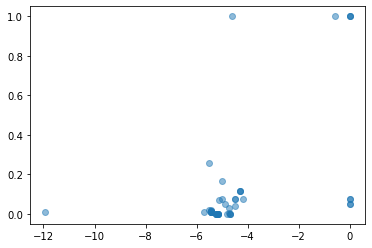

In [36]:
#make scatter plot of prop wild and prop_untagged_unclipped

plt.scatter(np.log(df_merged['prop_untagged_unclipped']), df_merged['chinook0_wild_prop'], alpha = 0.5)
# plt.xlim([-0.001,0.02])
# plt.ylim([-0.01,0.4])

In [37]:
#save file
df_merged.to_csv(data_string+"puyallup_2004-2021_rmis.csv")

In [47]:
subset_agg = subset_df[subset_df['species']==1].groupby(['first_release_date','release_stage']).agg({'total':sum,
                                                        'untagged_unknown':sum,
                                                        'untagged_unclipped':sum})
subset_agg['unmarked'] = subset_agg['untagged_unknown'] + subset_agg['untagged_unclipped']
subset_agg['prop_unmarked'] = subset_agg['unmarked']/subset_agg['total']
subset_agg

total  untagged_unknown  \
first_release_date release_stage                              
2004-06-02         G               103200                 0   
2005-06-01         G               100400                 0   
2007-04-12         G               223740                 0   
2007-05-29         G                82927                 0   
2008-05-22         G                97000                 0   
2008-05-23         G               261240                 0   
                   S               157000                 0   
2010-06-06         G               894000                 0   
2011-05-17         G               901800                 0   
2012-04-01         Y               128000                 0   
2012-05-16         G                10185                 0   
2012-05-17         G              1465700                 0   
2014-05-23         G              1126356                 0   
2015-05-20         G               216800                 0   
2023-01-03         F               256500                 0   
2023-01-20         F               200000                 0   

                                  untagged_unclipped  unmarked  prop_unmarked  
first_release_date release_stage                                               
2004-06-02         G                             546       546       0.005291  
2005-06-01         G                               0         0       0.000000  
2007-04-12         G                          223740    223740       1.000000  
2007-05-29         G                            2012      2012       0.024262  
2008-05-22         G                               0         0       0.000000  
2008-05-23         G                               0         0       0.000000  
                   S                               0         0       0.000000  
2010-06-06         G                          894000    894000       1.000000  
2011-05-17         G                          901800    901800       1.000000  
2012-04-01         Y                            1280      1280       0.010000  
2012-05-16         G                             115       115       0.011291  
2012-05-17         G                          527539    527539       0.359923  
2014-05-23         G                         1023325   1023325       0.908527  
2015-05-20         G                          216800    216800       1.000000  
2023-01-03         F                          256500    256500       1.000000  
2023-01-20         F                          200000    200000       1.000000